# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras 
from tqdm import tqdm
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob 
import pandas as pan
import matplotlib.pyplot as plotter
import warnings
warnings.filterwarnings('ignore')

# Input Data

In [2]:
image_data='/kaggle/input/defungi'
pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

,Files_Name
0,H3
1,H6
2,H5
3,H1
4,H2


In [3]:
files = [i for i in glob.glob(image_data + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pan.DataFrame(data, columns = ["Image", "Label"])
dataframe

,Image,Label
0,/kaggle/input/defungi/H1/H1_23b_4.jpg,H1
1,/kaggle/input/defungi/H5/H5_44b_1.jpg,H5
2,/kaggle/input/defungi/H1/H1_101c_4.jpg,H1
3,/kaggle/input/defungi/H2/H2_68a_2.jpg,H2
4,/kaggle/input/defungi/H1/H1_95b_7.jpg,H1
...,...,...
9109,/kaggle/input/defungi/H5/H5_126a_4.jpg,H5
9110,/kaggle/input/defungi/H2/H2_5b_1.jpg,H2
9111,/kaggle/input/defungi/H3/H3_4b_12.jpg,H3
9112,/kaggle/input/defungi/H1/H1_16c_1.jpg,H1


# Visualization

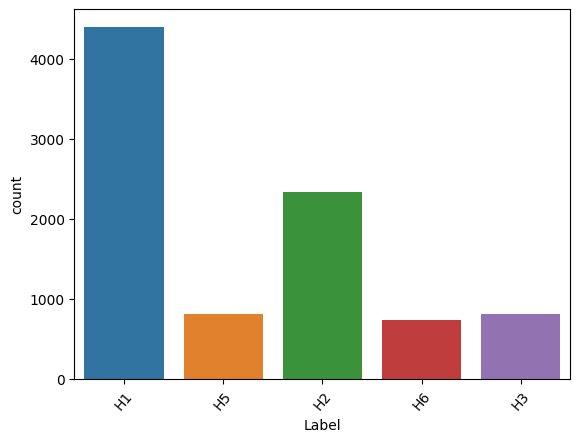

In [4]:
sns.countplot(x = dataframe["Label"])
plotter.xticks(rotation = 50);

# Split Train and Test Dataset

In [5]:
train_data_dir =image_data
batch_size = 32
target_size = (224,224)
validation_split = 0.2
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=200,
    image_size=target_size,
    batch_size=batch_size,
)

Found 9114 files belonging to 5 classes.
Using 7292 files for training.
Found 9114 files belonging to 5 classes.
Using 1822 files for validation.


In [6]:
class_names = train.class_names
class_names

['H1', 'H2', 'H3', 'H5', 'H6']

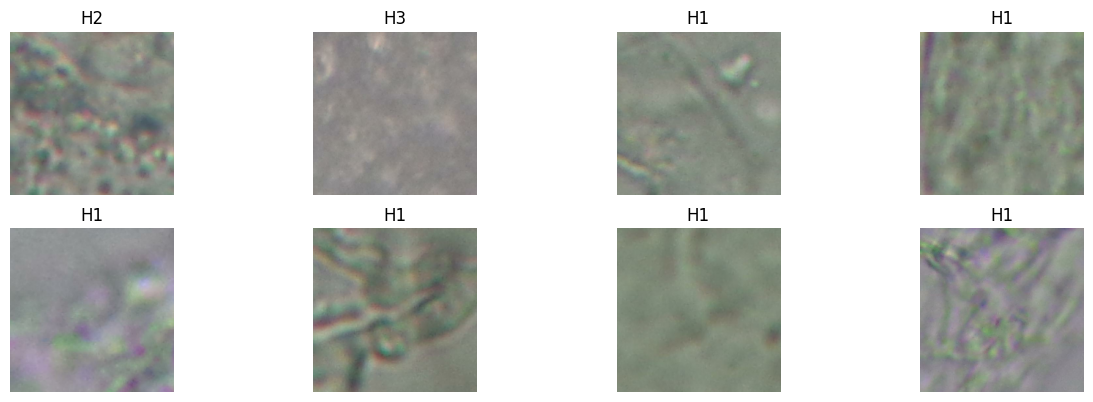

In [7]:
plt.figure(figsize=(15, 20))
for images, labels in train.take(1):
    for i in range(8):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# Model

In [8]:
base_model = tf.keras.applications.MobileNetV3Small(input_shape=(224,224,3),include_top=False,weights='imagenet')
base_model.trainable = False
keras_model=keras.models.Sequential()
keras_model.add(base_model)
keras_model.add(keras.layers.Flatten()) 
keras_model.add(keras.layers.Dropout(0.5))
keras_model.add(keras.layers.Dense(5,activation=tf.nn.softmax))
keras_model.summary()

4334752/4334752 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3small (Functiona  (None, 7, 7, 576)        939120    
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dropout (Dropout)           (None, 28224)             0         
                                                                 
 dense (Dense)               (None, 5)                 141125    
                                                                 
Total params: 1,080,245
Trainable params: 141,125
Non-trainable params: 939,120
_________________________________________________________________


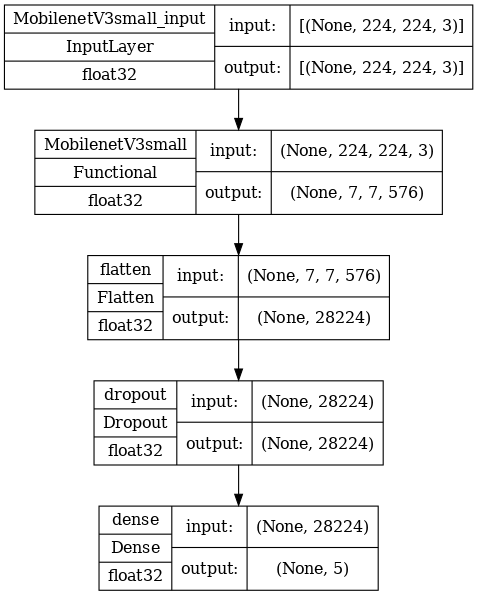

In [9]:
tf.keras.utils.plot_model(keras_model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=80)

In [10]:
checkpoint =ModelCheckpoint("my_keras_model.h5", save_best_only=True)

In [11]:
early_stopping =EarlyStopping(patience=5, restore_best_weights=True)

In [12]:
keras_model.compile(optimizer ='Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist=keras_model.fit_generator(train,epochs=15,validation_data=validation,callbacks=[checkpoint,early_stopping])

Epoch 1/15
228/228 [==============================] - 85s 354ms/step - loss: 1.5519 - accuracy: 0.6052 - val_loss: 0.7577 - val_accuracy: 0.7722
Epoch 2/15
228/228 [==============================] - 78s 340ms/step - loss: 0.9070 - accuracy: 0.7426 - val_loss: 0.5158 - val_accuracy: 0.8485
Epoch 3/15
228/228 [==============================] - 78s 339ms/step - loss: 0.7047 - accuracy: 0.7976 - val_loss: 0.4725 - val_accuracy: 0.8683
Epoch 4/15
228/228 [==============================] - 72s 313ms/step - loss: 0.5979 - accuracy: 0.8300 - val_loss: 0.3769 - val_accuracy: 0.8919
Epoch 5/15
228/228 [==============================] - 76s 333ms/step - loss: 0.5869 - accuracy: 0.8397 - val_loss: 0.5148 - val_accuracy: 0.8699
Epoch 6/15
228/228 [==============================] - 76s 333ms/step - loss: 0.5363 - accuracy: 0.8541 - val_loss: 0.4139 - val_accuracy: 0.8908
Epoch 7/15
228/228 [==============================] - 76s 334ms/step - loss: 0.4980 - accuracy: 0.8655 - val_loss: 0.5141 - val_ac

In [13]:
score, acc = keras_model.evaluate(validation)
print('Test Loss =', score)
print('Test Accuracy =', acc)

57/57 [==============================] - 13s 217ms/step - loss: 0.3769 - accuracy: 0.8919
Test Loss = 0.37693217396736145
Test Accuracy = 0.8918770551681519


In [14]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,1.551882,0.605184,0.757666,0.772228
1,0.907044,0.742595,0.515822,0.848518
2,0.704688,0.797586,0.472481,0.868277
3,0.597881,0.829951,0.376932,0.891877
4,0.586878,0.839687,0.514766,0.869923
5,0.536316,0.854087,0.413852,0.890779
6,0.498026,0.865469,0.514092,0.895719
7,0.460993,0.874246,0.498293,0.875412
8,0.425608,0.885080,0.411688,0.900659


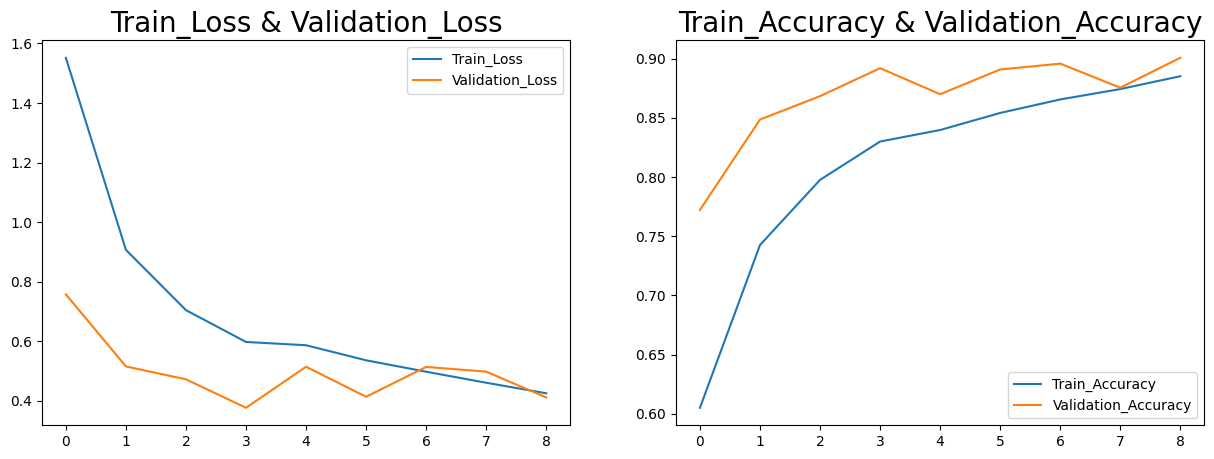

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

In [16]:
X_val,y_val,y_pred=[],[],[]
for images, labels in validation:
    y_val.extend(labels.numpy())
    X_val.extend(images.numpy())
predictions=keras_model.predict(np.array(X_val))
for i in predictions:
    y_pred.append(np.argmax(i))
df=pd.DataFrame()
df['Actual'],df['Prediction']=y_val,y_pred
df

57/57 [==============================] - 13s 205ms/step


,Actual,Prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1817,1,1
1818,3,3
1819,0,0
1820,0,0


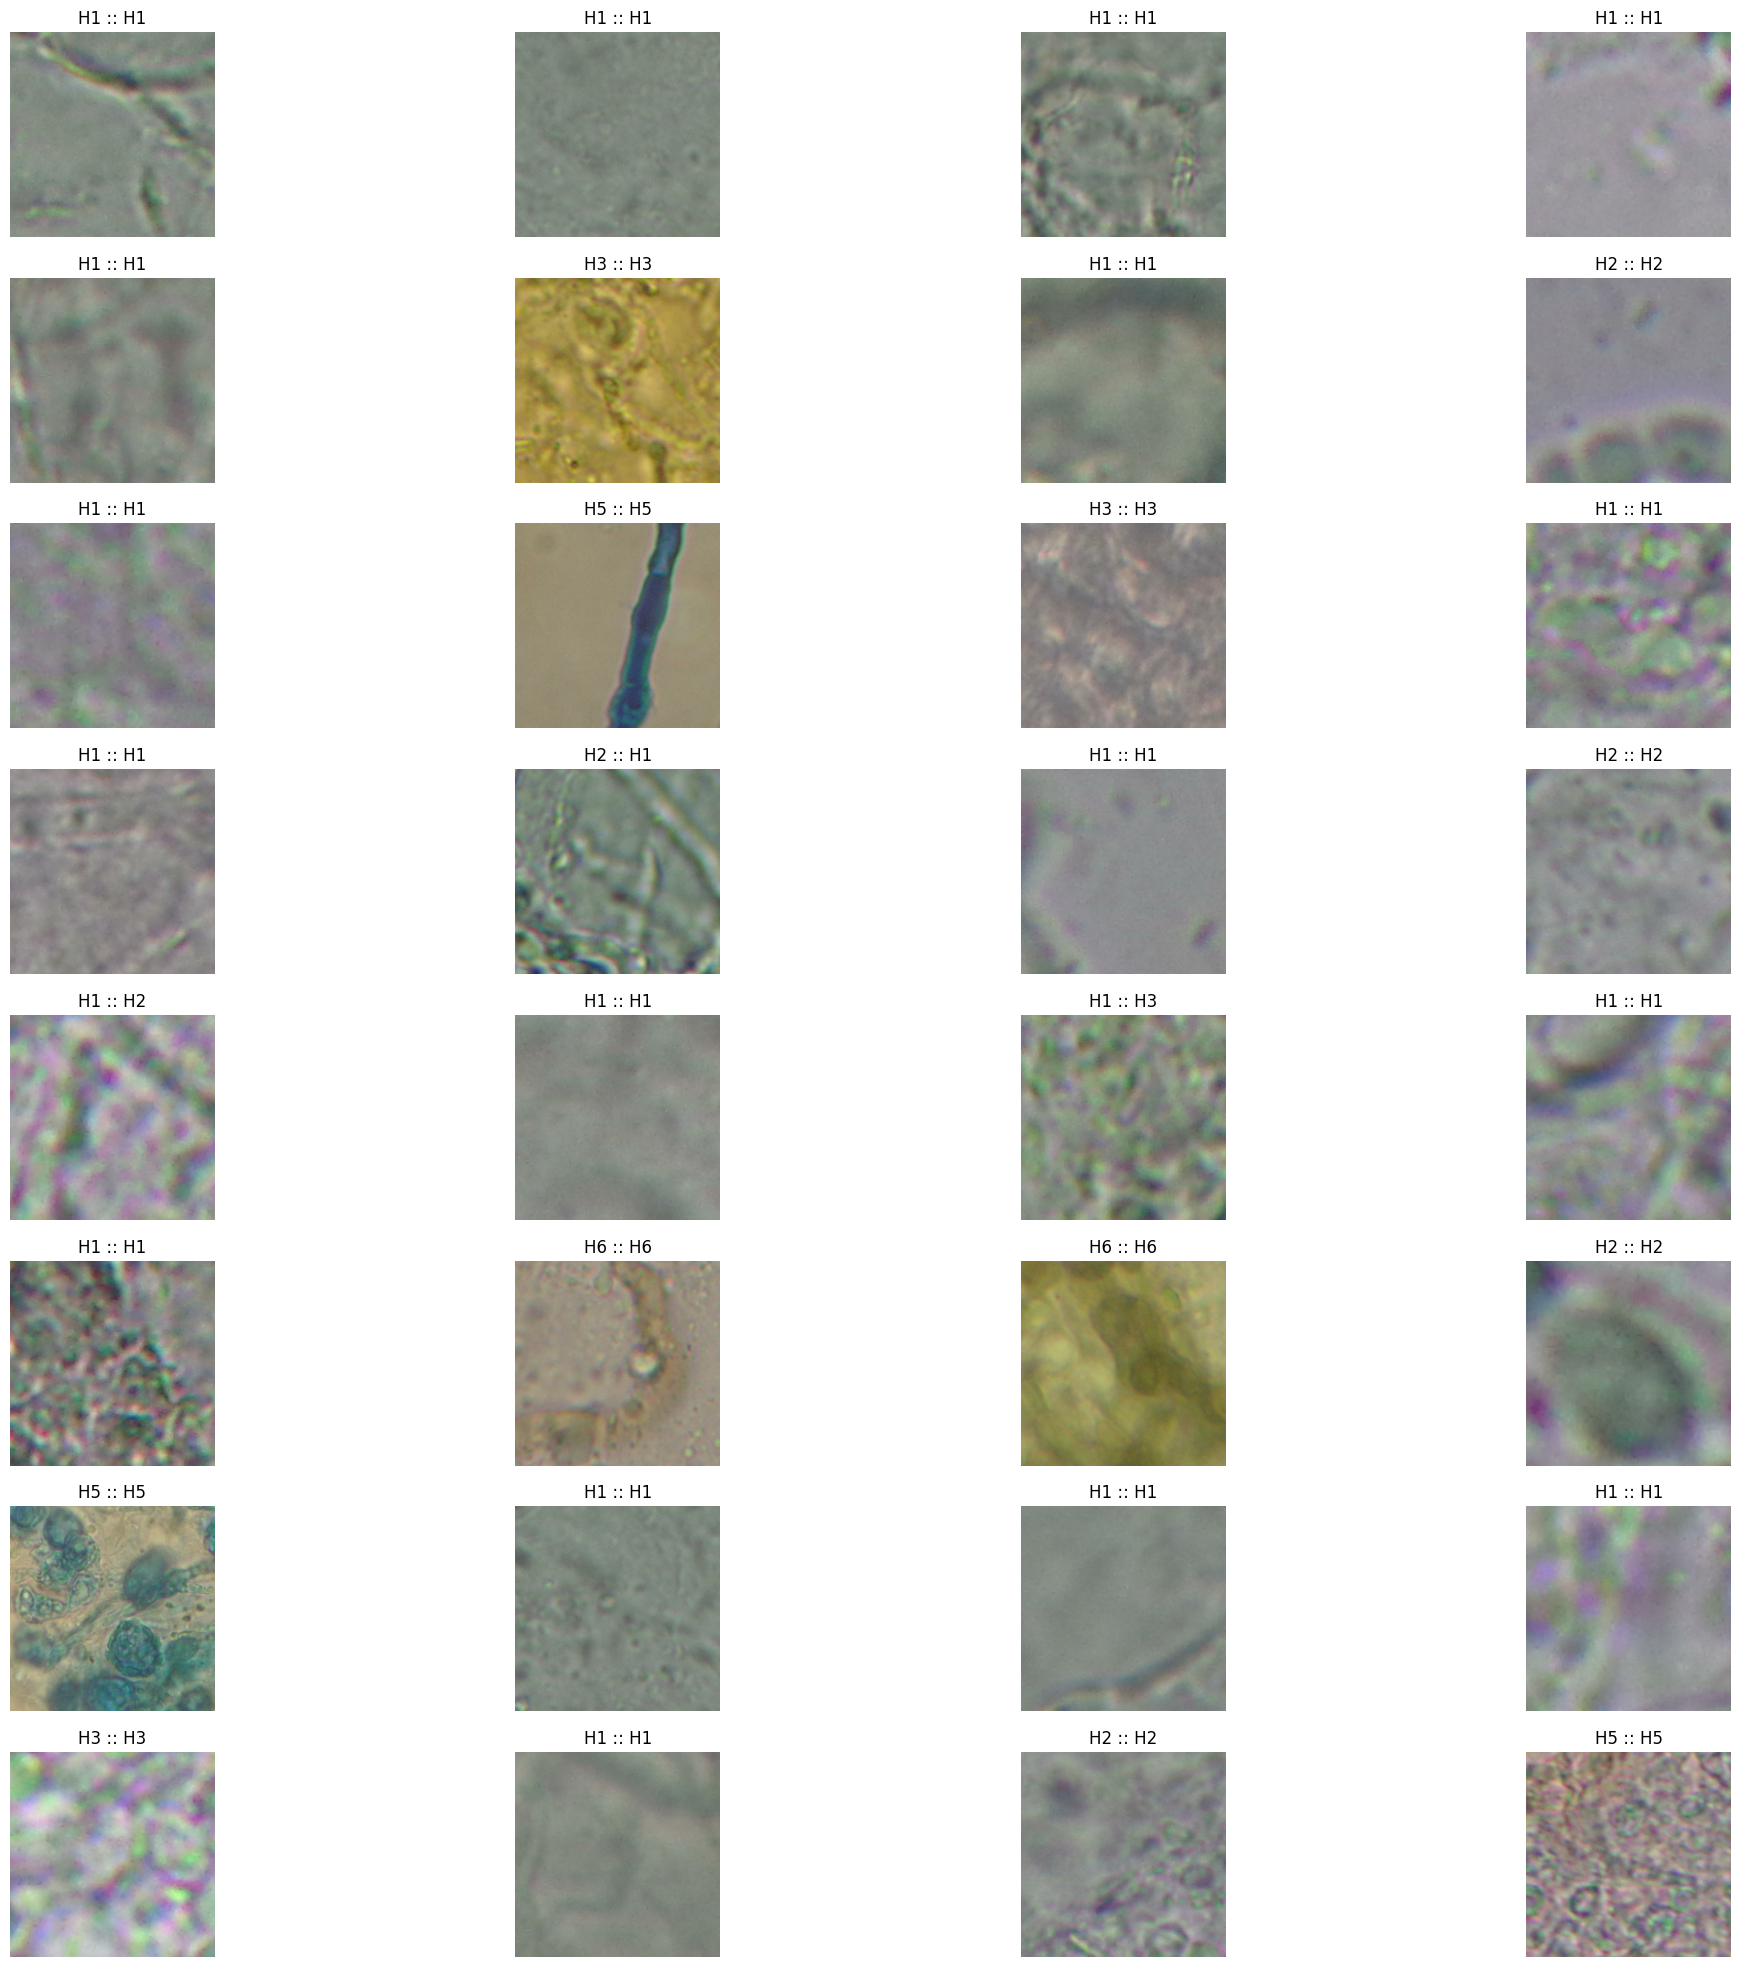

In [17]:
plt.figure(figsize=(25,25))
for i in range(32):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(X_val[i].astype("uint8"))
    plt.title(f'{class_names[y_val[i]]} :: {class_names[y_pred[i]]}')
    plt.axis("off")

# Confusion_matrix

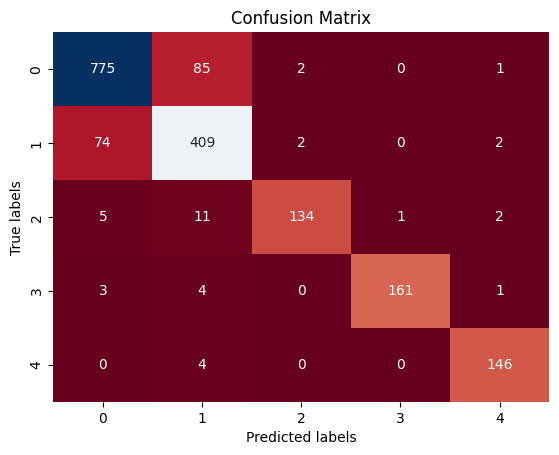

array([[775,  85,   2,   0,   1],
       [ 74, 409,   2,   0,   2],
       [  5,  11, 134,   1,   2],
       [  3,   4,   0, 161,   1],
       [  0,   4,   0,   0, 146]])

In [18]:
ax= plt.subplot()
CM = confusion_matrix(y_val,y_pred)
sns.heatmap(CM, annot=True, fmt='g', ax=ax,cbar=False,cmap='RdBu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
plt.show()
CM

In [19]:
Acc = accuracy_score(y_val,y_pred)
print("accuracy is: {0:.3f}%".format(Acc * 100))

accuracy is: 89.188%


In [20]:
model.save('fungi.h5')

NameError: name 'model' is not defined

***Conclusion:In terms of speed 「MobileNetV3Small」 is faster than 「VGG19」 ，then it accuracy is good, so I think the benefits are greater!***

**I'm a beginner in the python world, not in undergrad or for work, I'm participating in Competitions purely out of interest, and I'm still learning a lot of different ways to do it. I hope you'll give me your vote as well as comments to help me improve in the future, thanks!    Mr.Tao**